In [1]:
import pandas as pd
from pathlib import Path
import plotly.express as px

In [2]:
path = "/Users/coes3/phd-labs/fraganal/data_source/tor/"

In [3]:
def is_censored(row, users, lower, upper):
    if  row[users] > row[upper]:
        return 1
    elif row[users] < row[lower]:
        return 0
    else:
        return 0

In [4]:
def data_prep(path):
    #  function to prep tor data in pandas
    
    files = Path(path).glob('*.csv')
    dfs = []
    
    for i in files:
        data = pd.read_csv(i, header=5)
        dfs.append(data)
        
    df = pd.concat(dfs, ignore_index=True)
    df.dropna(subset = ['country'], inplace = True)
    df = df[(df["country"] != '??')]
    
    df['censored'] = df.apply(lambda row: is_censored(row,'users', 'lower', 'upper') , axis=1)
    df['country']= df['country'].str.upper()
    df.rename(columns = {'country':'cc'}, inplace = True)
    
    columns = ['upper', 'lower', 'frac']
    df.drop(columns, inplace=True, axis=1)
    
    #filter df with only these countries
    cc_list = ['CN','BR','DE','IN','IQ', 'RW']
    df = df[df['cc'].isin(cc_list)]
    
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
    
    #  filter for only 2022 data
    df = df.loc[(df['date'] >= '2022-01-01') & (df['date'] <='2022-12-31')]
    
    df = df.loc[df['users'] != 0]
    
    return df

In [15]:
df = data_prep(path)

In [16]:
def plot_graph(df, cc):
    df = df.loc[df['cc'] == cc]
    fig = px.line(df, x="date", y="users", color="censored", hover_data=['users'], template='simple_white')
    fig.update_xaxes(dtick="M1", tickformat="%b\n%Y")
    fig.update_layout(
        title_text=f"Annual Tor Relay Users in 2022, {cc}",
    )
    fig.show()

In [ ]:
df = df.loc[df['cc'] == cc]

In [17]:
cc_list = list(df['cc'].unique())

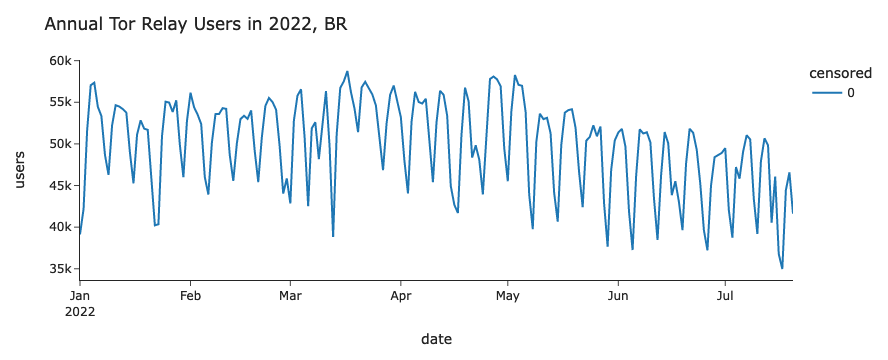

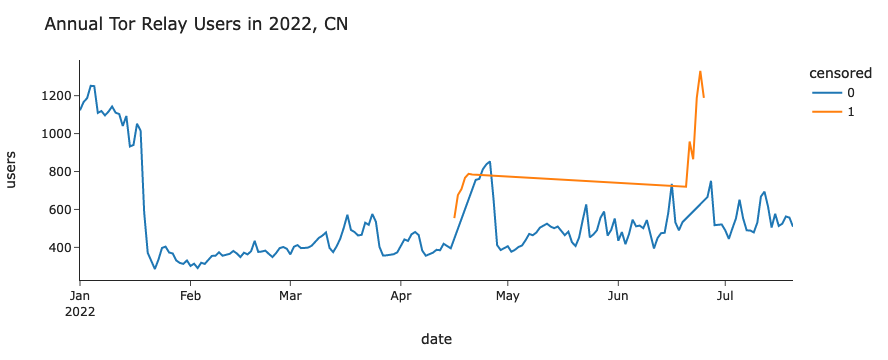

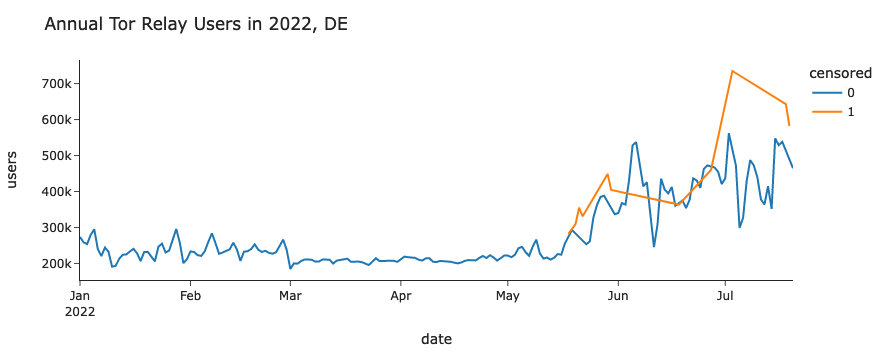

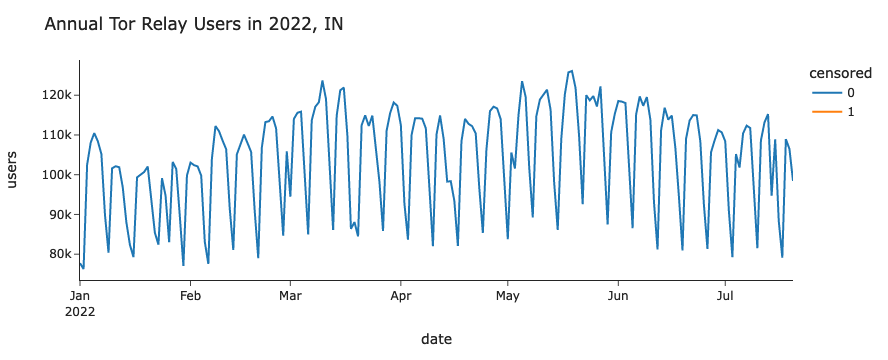

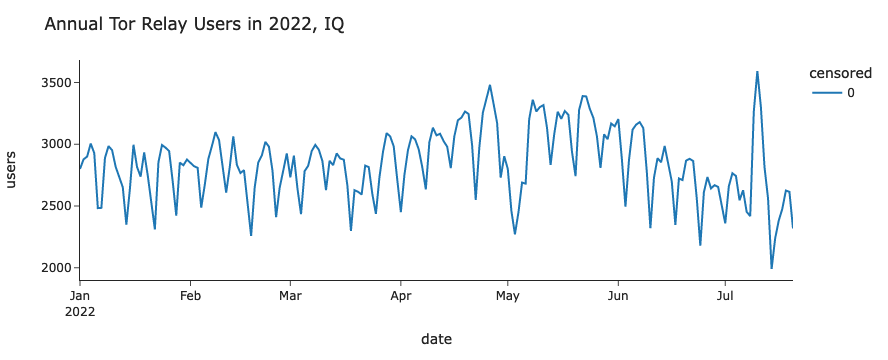

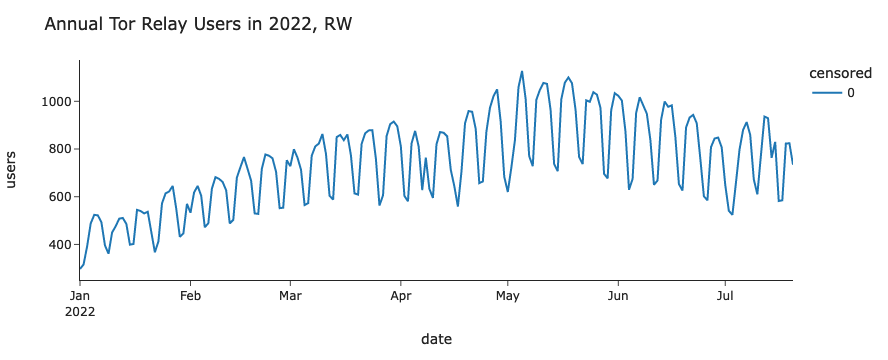

In [19]:
for i in cc_list:
    plot_graph(df, i)

In [14]:
df

,date,cc,users,censored
910496,2022-01-01,BR,39132,0
910511,2022-01-01,CN,1123,0
910520,2022-01-01,DE,273747,0
910566,2022-01-01,IN,77752,0
910568,2022-01-01,IQ,2800,0
...,...,...,...,...
958945,2022-07-20,CN,509,0
958954,2022-07-20,DE,464570,0
959000,2022-07-20,IN,98446,0
959002,2022-07-20,IQ,2318,0
